In [20]:
# !pip install langchain langchain-community langchain-openai langchain-chroma chromadb
# !pip install langchain_huggingface

# Data Exploration


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
books = pd.read_csv('data/books.csv')

In [23]:
books.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0


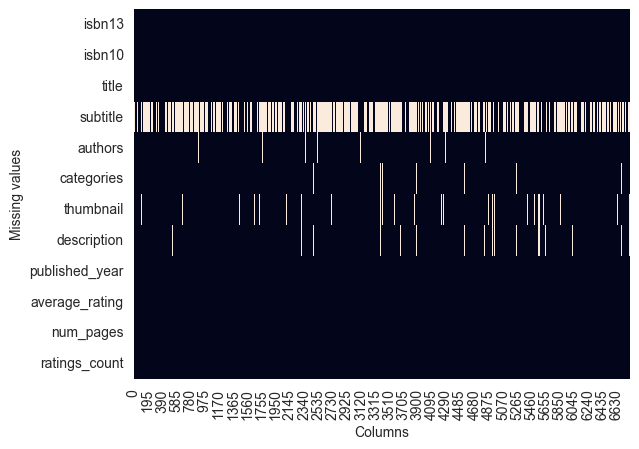

In [24]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [25]:
books['missing_description'] = np.where(books['description'].isna(), 1, 0)
books["age_of_book"] = 2024 - books['published_year']

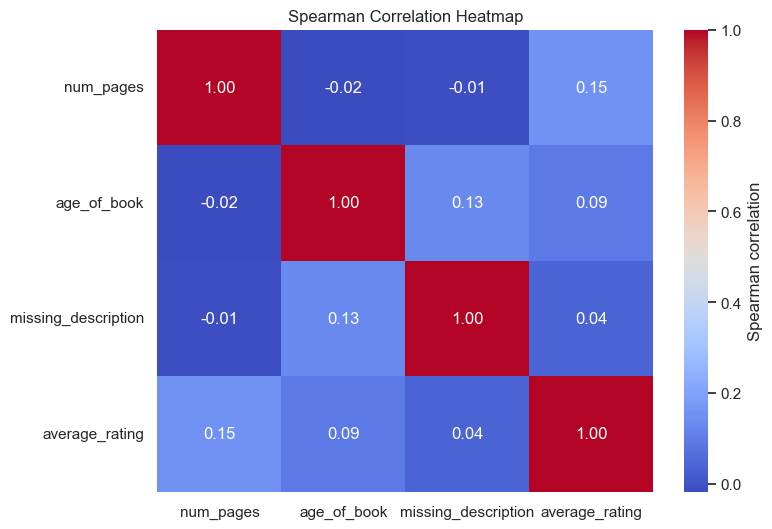

In [26]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label" : "Spearman correlation"})
heatmap.set_title("Spearman Correlation Heatmap")
plt.show()

In [27]:
book_missing = books[~(books["description"].isna()) |
      ~(books["num_pages"].isna()) |
      ~(books["average_rating"].isna()) |
      ~(books["published_year"].isna())
]

In [28]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,31.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0,1,20.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0


In [29]:
categories_count_df = book_missing['categories'].value_counts().reset_index().sort_values("count", ascending=False)
categories_count_df

,categories,count
0,Fiction,2588
1,Juvenile Fiction,538
2,Biography & Autobiography,401
3,History,264
4,Literary Criticism,166
...,...,...
304,Organized Crime,1
303,Autism,1
302,Botanique,1
301,English essays,1


In [30]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

In [31]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0,14.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,31.0,NaN
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0,1,20.0,NaN
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0,245.0


In [32]:
book_missing.loc[book_missing["words_in_description"].between(1, 4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [33]:
book_missing.loc[book_missing["words_in_description"].between(5, 14), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 312, dtype: object

In [34]:
book_missing.loc[book_missing["words_in_description"].between(15, 24), "description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 950, dtype: object

In [35]:
book_missing.loc[book_missing["words_in_description"].between(25, 34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6798    Presents the adventures of a new group of hero...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1233, dtype: object

In [36]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]

In [37]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288.0
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174.0


In [38]:
book_missing_25_words["title_and_subtitle"] = (np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"],
                                                       book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1)))

C:\Users\mgrun\AppData\Local\Temp\ipykernel_23824\4007941329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = (np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"],


In [39]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199.0,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205.0,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57.0,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45.0,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75.0,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288.0,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63.0,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117.0,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174.0,I Am that: Talks with Sri Nisargadatta Maharaj


In [40]:
book_missing_25_words["tagged_description"] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)

C:\Users\mgrun\AppData\Local\Temp\ipykernel_23824\2691489279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged_description"] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)


In [41]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63.0,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [42]:
book_missing_25_words.drop(['subtitle', 'missing_description', 'age_of_book', 'words_in_description'], axis=1).to_csv("data/books_cleaned.csv", index=False)

# Building vector database


In [149]:
from langchain_community.document_loaders import TextLoader # converts raw text (book description) and convert it to format that longchain can work with
from langchain.text_splitter import CharacterTextSplitter # splits whole document containing all of the descriptions into meaningful chunks (individual desc of each book)
# from langchain_openai import OpenAIEmbeddings # converting chunks into document embeddings
from langchain_chroma import Chroma # storing embeddings in vector database ChromaDB
from langchain_huggingface import HuggingFaceEmbeddings

In [150]:
from dotenv import load_dotenv

load_dotenv()

False

In [151]:
import csv
import pandas as pd

books = pd.read_csv("data/books_cleaned.csv", encoding="utf-8", on_bad_lines="skip")

books["tagged_description"] = books["tagged_description"].str.replace('"', '', regex=False)
print(books['tagged_description'].head())

0    9780002005883 A NOVEL THAT READERS and critics...
1    9780002261982 A new 'Christie for Christmas' -...
2    9780006178736 A memorable, mesmerizing heroine...
3    9780006280897 Lewis' work on the nature of lov...
4    9780006280934 In The Problem of Pain, C.S. Lew...
Name: tagged_description, dtype: object


In [152]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 In The Problem of Pain, C.S. Lew..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5225,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...
5226,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...
5227,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
5228,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [153]:
books["tagged_description"]

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
2       9780006178736 A memorable, mesmerizing heroine...
3       9780006280897 Lewis' work on the nature of lov...
4       9780006280934 In The Problem of Pain, C.S. Lew...
                              ...                        
5225    9788172235222 On A Train Journey Home To North...
5226    9788173031014 This book tells the tale of a ma...
5227    9788179921623 Wisdom to Create a Life of Passi...
5228    9788185300535 This collection of the timeless ...
5229    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5230, dtype: object

In [154]:
books['tagged_description'].to_csv("data/tagged_description.txt", sep='\n', index=False)

In [155]:
raw_documents = TextLoader('data/tagged_description.txt', encoding='utf-8').load()
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n") #prioritise splitting on the separator rather than on chunksize
documents = text_splitter.split_documents(raw_documents)

Created a chunk of size 18, which is longer than the specified 0
Created a chunk of size 1168, which is longer than the specified 0
Created a chunk of size 1214, which is longer than the specified 0
Created a chunk of size 373, which is longer than the specified 0
Created a chunk of size 309, which is longer than the specified 0
Created a chunk of size 477, which is longer than the specified 0
Created a chunk of size 482, which is longer than the specified 0
Created a chunk of size 960, which is longer than the specified 0
Created a chunk of size 188, which is longer than the specified 0
Created a chunk of size 843, which is longer than the specified 0
Created a chunk of size 274, which is longer than the specified 0
Created a chunk of size 191, which is longer than the specified 0
Created a chunk of size 875, which is longer than the specified 0
Created a chunk of size 1088, which is longer than the specified 0
Created a chunk of size 1189, which is longer than the specified 0
Created

In [156]:
documents[0]

Document(metadata={'source': 'data/tagged_description.txt'}, page_content='tagged_description')

In [157]:
print(f"Number of documents: {len(documents)}")
print(f"Average document length: {sum(len(doc.page_content) for doc in documents)/len(documents)} characters")


Number of documents: 5231
Average document length: 501.87497610399544 znaków


In [52]:
# from langchain.embeddings import HuggingFaceEmbeddings
#
# huggingface_embeddings = HuggingFaceEmbeddings(
#     model_name="sentence-transformers/all-MiniLM-L6-v2",
#     model_kwargs={"device": "cuda"}  # lub "cuda" jeśli masz GPU
# )
# print("Model loaded")

In [158]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

print("Model loaded")

Model loaded


In [159]:
from langchain.embeddings.base import Embeddings

class MySTEmbeddings(Embeddings):
    def __init__(self, model):
        self.model = model

    def embed_documents(self, texts):
        # texts: lista stringów
        print(f"--- ROZPOCZĘTO EMBEDDING dla {len(texts)} dokumentów ---") # Dodaj ten print
        embeddings = self.model.encode(texts, show_progress_bar=True).tolist()
        print(f"--- ZAKOŃCZONO EMBEDDING dla {len(texts)} dokumentów ---") # Dodaj ten print
        return embeddings


    def embed_query(self, text):
        return self.model.encode([text])[0].tolist()

my_embeddings = MySTEmbeddings(model)

In [160]:
# Zakładam, że documents to lista Document (np. po text_splitter)
from langchain.vectorstores import FAISS
import pickle

docs = documents

batch_size = 500
db_faiss = None
all_docs = []  # przechowujemy wszystkie dokumenty

for i in range(0, len(docs), batch_size):
    batch = docs[i:i + batch_size]
    all_docs.extend(batch)

    if db_faiss is None:
        # Pierwszy batch tworzy bazę
        db_faiss = FAISS.from_documents(batch, embedding=my_embeddings)
        print(f"Created FAISS base with batch {i}–{i + len(batch)}")
    else:
        # Kolejne batchy dodawane
        db_faiss.add_documents(batch)
        print(f"Added batch {i}–{i + len(batch)}")

db_faiss.save_local("faiss_index")  # zapisuje plik faiss_index.index
with open("data/faiss_docs.pkl", "wb") as f:
    pickle.dump(all_docs, f)

print("FAISS index i dokumenty zapisane ✅")

--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:03<00:00,  4.97it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Created FAISS base with batch 0–500
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:02<00:00,  7.23it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 500–1000
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 1000–1500
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:01<00:00,  8.25it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 1500–2000
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:01<00:00,  8.54it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 2000–2500
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:02<00:00,  7.58it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 2500–3000
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 3000–3500
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 3500–4000
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 4000–4500
--- ROZPOCZĘTO EMBEDDING dla 500 dokumentów ---


Batches: 100%|██████████| 16/16 [00:02<00:00,  6.17it/s]


--- ZAKOŃCZONO EMBEDDING dla 500 dokumentów ---
Added batch 4500–5000
--- ROZPOCZĘTO EMBEDDING dla 231 dokumentów ---


Batches: 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

--- ZAKOŃCZONO EMBEDDING dla 231 dokumentów ---
Added batch 5000–5231
FAISS index i dokumenty zapisane ✅


In [56]:
# db_books = None
# batch_size = 500
#
# for i in range(0, len(documents), batch_size):
#     batch = documents[i:i+batch_size]
#
#     if db_books is None:
#         # Pierwszy batch tworzy bazę
#         db_books = Chroma.from_documents(batch, embedding=my_embeddings, persist_directory="db_books")
#         print(f"Created base with batch {i}–{i+len(batch)}")
#     else:
#         # Kolejne batchy dodawane
#         print(f"ROZPOCZĘCIE dodawania batcha {i}–{i+len(batch)}") # Nowy print
#         db_books.add_documents(batch)
#         print(f"Dodano batch {i}–{i+len(batch)} ✅") # Zmieniony print
#
# db_books.persist()
# print("Baza zapisana ✅")


In [57]:
# huggingface_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


# db_books = Chroma.from_documents(
#     documents,
#     embedding=huggingface_embeddings,
#     show_progress=True
# )

In [162]:
query = 'A book to teach children about nature'
docs = db_faiss.similarity_search(query, k=10)
docs

[Document(id='38a7a43a-0651-4c84-a70e-e16b95eae28c', metadata={'source': 'data/tagged_description.txt'}, page_content="9780067575208 First published more than three decades ago, this reissue of Rachel Carson's award-winning classic brings her unique vision to a new generation of readers. Stunning new photographs by Nick Kelsh beautifully complement Carson's intimate account of adventures with her young nephew, Roger, as they enjoy walks along the rocky coast of Maine and through dense forests and open fields, observing wildlife, strange plants, moonlight and storm clouds, and listening to the living music of insects in the underbrush. If a child is to keep alive his inborn sense of wonder. Writes Carson, he needs the companionship of at least one adult who can share it, rediscovering with him the joy, excitement and mystery of the world we live in. The Sense of Wonder is a refreshing antidote to indifference and a guide to capturing the simple power of discovery that Carson views as es

In [163]:
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
452,9780067575208,006757520X,The Sense of Wonder,Rachel Carson,Nature,http://books.google.com/books/content?id=Zee5S...,"First published more than three decades ago, t...",1998.0,4.39,112.0,1160.0,The Sense of Wonder,9780067575208 First published more than three ...


In [164]:
def retrieve_semantic_recomendations(query: str, top_k: int = 10) -> pd.DataFrame:
    recs = db_faiss.similarity_search(query, k=50)

    books_list = []

    for i in range(0, len(recs)):
      books_list.append(int(recs[i].page_content.strip('"').split()[0]))

    return books[books["isbn13"].isin(books_list)].head(top_k)

In [168]:
df = retrieve_semantic_recomendations('A book about space adventure and universe')

In [169]:
df

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
6,9780006470229,000647022X,The Gap Into Madness,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,The Gap Into Madness: Chaos and Order,9780006470229 A new-cover reissue of the fourt...
112,9780060506049,0060506040,Worlds Enough & Time,Dan Simmons,Fiction,http://books.google.com/books/content?id=EKoIG...,An extraordinary artist with few rivals in his...,2002.0,3.75,272.0,923.0,Worlds Enough & Time: Five Tales of Speculativ...,9780060506049 An extraordinary artist with few...
349,9780061053566,0061053562,The Player of Games,Iain Banks,Fiction,http://books.google.com/books/content?id=io0JA...,"Gurgeh, a champion game player, travels a hund...",1997.0,4.27,293.0,43988.0,The Player of Games,"9780061053566 Gurgeh, a champion game player, ..."
738,9780141011110,0141011114,The Fabric of the Cosmos,Brian Greene,Science,http://books.google.com/books/content?id=dpSqv...,From the bestselling author of The Elegant Uni...,2005.0,4.12,592.0,324.0,"The Fabric of the Cosmos: Space, Time and the ...",9780141011110 From the bestselling author of T...
844,9780142500378,0142500372,Enchantress from the Stars,Sylvia Louise Engdahl,Juvenile Fiction,http://books.google.com/books/content?id=rntJA...,When young Elana unexpectedly joins the team l...,2003.0,3.94,304.0,2031.0,Enchantress from the Stars,9780142500378 When young Elana unexpectedly jo...
908,9780156027595,0156027593,The Cyberiad,Stanislaw Lem,Fiction,http://books.google.com/books/content?id=kWElP...,Trurl and Klaupacius are constructor robots wh...,2002.0,4.18,295.0,7512.0,The Cyberiad,9780156027595 Trurl and Klaupacius are constru...
941,9780156306300,0156306301,Fiasco,Stanislaw Lem,Fiction,http://books.google.com/books/content?id=4IZ3P...,When a crew of earthmen--among them a space pi...,1988.0,4.12,322.0,2125.0,Fiasco,9780156306300 When a crew of earthmen--among t...
1287,9780312864743,0312864744,Ports of Call,Jack Vance,Fiction,http://books.google.com/books/content?id=_Zu4S...,A romantic tale follows a space swashbuckler a...,1999.0,3.53,300.0,395.0,Ports of Call,9780312864743 A romantic tale follows a space ...
1290,9780312872793,0312872798,Lurulu,Jack Vance,Fiction,http://books.google.com/books/content?id=Jm3au...,"Continues the adventures of Myron Tany, a rebe...",2007.0,3.58,204.0,268.0,Lurulu,9780312872793 Continues the adventures of Myro...
1299,9780312890216,0312890214,The Starry Rift,James Tiptree,Fiction,NaN,This novel set in the far-future and filled wi...,1994.0,3.82,250.0,220.0,The Starry Rift,9780312890216 This novel set in the far-future...


In [170]:
df['description'][6]

"A new-cover reissue of the fourth book in the bestselling five-volume sf series created by the world-famous author of the Thomas Covenant chronicles -- and acclaimed as the 'best work of his career'. Events were not moving as the Amnion had intended. Once again humans had been false in their dealings with the aliens. As the planetoid Thanatos Minor exploded into atoms, the Trumpet hurtled into space only one step ahead of hostile pursuers. On board were Morn Hyland and her force-grown son Davies, cyborg Angus Thermopyle and Captain Nick Succorso -- old enemies thrown together in a desperate bid for survival. For both the Amnion and the UMCP, the immediate capture of the fleeing ship and the secrets it contained was imperative. But for Trumpet's exhausted crew the only hope lay in an illegal lab in the distant binary solar system of Valdor Industrial. It would be a journey of unpredictable danger -- from which not all would return..."

# Books Classification

In [62]:
category_mapping = {
    'Fiction': "Fiction",
    'Juvenile Fiction': "Children's Fiction",
    'Biography & Autobiography': "Nonfiction",
    'History': "Nonfiction",
    'Literary Criticism': "Nonfiction",
    'Philosophy': "Nonfiction",
    'Religion': "Nonfiction",
    'Comics & Graphic Novels': "Fiction",
    'Drama': "Fiction",
    'Juvenile Nonfiction': "Children's Nonfiction",
    'Science': "Nonfiction",
    'Poetry': "Fiction"
}

books["simple_categories"] = books["categories"].map(category_mapping)

In [63]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 In The Problem of Pain, C.S. Lew...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5225,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5226,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5227,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5228,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [64]:
books[~(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,Fiction
5221,9787506435673,7506435675,Good Fight,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,Good Fight,9787506435673 Presents the adventures of a new...,Children's Fiction
5222,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
5228,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [65]:
from transformers import pipeline

fiction_categories = ['Fiction', 'Nonfiction']

pipe = pipeline('zero-shot-classification', model='facebook/bart-large-mnli', device=0)

C:\Users\mgrun\PycharmProjects\Books-sentiment-analysis-and-classification\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mgrun\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package 

In [66]:
sequence = books.loc[books["simple_categories"] == 'Fiction', 'description'].reset_index(drop=True)[0]

In [67]:
pipe(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [68]:
max_index = np.argmax(pipe(sequence, fiction_categories)["scores"])
max_label = pipe(sequence, fiction_categories)["labels"][max_index]
max_label

'Fiction'

In [69]:
def generate_predictions(sequence, categories):
  predictions = pipe(sequence, categories)
  max_index = np.argmax(predictions["scores"])
  max_label = predictions["labels"][max_index]
  return max_label

In [70]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

for i in tqdm(range(0, 300)):
  sequence = books.loc[books["simple_categories"] == 'Fiction', 'description'].reset_index(drop=True)[i]
  predicted_cats.append(generate_predictions(sequence, fiction_categories))
  actual_cats += ["Fiction"]

100%|██████████| 300/300 [00:16<00:00, 18.15it/s]


In [71]:
for i in tqdm(range(0, 300)):
  sequence = books.loc[books["simple_categories"] == 'Nonfiction', 'description'].reset_index(drop=True)[i]
  predicted_cats.append(generate_predictions(sequence, fiction_categories))
  actual_cats += ["Nonfiction"]

100%|██████████| 300/300 [00:17<00:00, 17.43it/s]


In [72]:
predictions_df = pd.DataFrame({"actual_categories": actual_cats, "predicted_categories": predicted_cats})

In [73]:
predictions_df

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
...,...,...
595,Nonfiction,Nonfiction
596,Nonfiction,Nonfiction
597,Nonfiction,Nonfiction
598,Nonfiction,Fiction


In [74]:
predictions_df['correct_prediction'] = np.where(predictions_df['actual_categories'] == predictions_df['predicted_categories'], 1, 0)

In [75]:
predictions_df['correct_prediction'].sum() / len(predictions_df)

0.7783333333333333

In [76]:
isbns = []
predicted_cats = []

missing_cats = books.loc[books["simple_categories"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [77]:
for i in tqdm(range(0, len(missing_cats))):
  sequence = missing_cats["description"][i]
  predicted_cats.append(generate_predictions(sequence, fiction_categories))
  isbns.append(missing_cats["isbn13"][i])

100%|██████████| 1463/1463 [01:33<00:00, 15.72it/s]


In [78]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_cats})

In [79]:
missing_predicted_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1458,9788125026600,Nonfiction
1459,9788171565641,Fiction
1460,9788172235222,Fiction
1461,9788173031014,Nonfiction


In [80]:
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(), books["predicted_categories"], books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [81]:
books['simple_categories'].isna().sum()

0

In [82]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 In The Problem of Pain, C.S. Lew...",Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5225,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction
5226,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction
5227,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction
5228,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [83]:
books.to_csv("books_with_categories.csv", index=False)

# Sentiment Analysis

In [84]:
from transformers import pipeline

classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None, device=0)

C:\Users\mgrun\PycharmProjects\Books-sentiment-analysis-and-classification\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mgrun\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but 

In [85]:
classifier("I like this!")

[[{'label': 'joy', 'score': 0.9789161086082458},
  {'label': 'neutral', 'score': 0.005833290051668882},
  {'label': 'anger', 'score': 0.00522431917488575},
  {'label': 'surprise', 'score': 0.0051293219439685345},
  {'label': 'disgust', 'score': 0.002720646560192108},
  {'label': 'sadness', 'score': 0.0018563242629170418},
  {'label': 'fear', 'score': 0.00032007426489144564}]]

In [86]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [87]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548410654067993},
  {'label': 'neutral', 'score': 0.16985201835632324},
  {'label': 'sadness', 'score': 0.1164090633392334},
  {'label': 'surprise', 'score': 0.020700663328170776},
  {'label': 'disgust', 'score': 0.019100729376077652},
  {'label': 'joy', 'score': 0.015161307528614998},
  {'label': 'anger', 'score': 0.003935149405151606}]]

In [88]:
classifier(books['description'][0].split("."))

[[{'label': 'surprise', 'score': 0.7296028733253479},
  {'label': 'neutral', 'score': 0.14038555324077606},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156358428299427},
  {'label': 'disgust', 'score': 0.002628474496304989},
  {'label': 'sadness', 'score': 0.002122160978615284}],
 [{'label': 'neutral', 'score': 0.4493706524372101},
  {'label': 'disgust', 'score': 0.2735913395881653},
  {'label': 'joy', 'score': 0.10908322036266327},
  {'label': 'sadness', 'score': 0.09362722933292389},
  {'label': 'anger', 'score': 0.04047833010554314},
  {'label': 'surprise', 'score': 0.02697017788887024},
  {'label': 'fear', 'score': 0.006879039574414492}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.01421144232

In [89]:
sentences = books["description"][0].split(".")
predictions = classifier(sentences)

In [90]:
sentences[0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives'

In [91]:
predictions[0]

[{'label': 'surprise', 'score': 0.7296028733253479},
 {'label': 'neutral', 'score': 0.14038555324077606},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'anger', 'score': 0.009156358428299427},
 {'label': 'disgust', 'score': 0.002628474496304989},
 {'label': 'sadness', 'score': 0.002122160978615284}]

In [92]:
sentences[3]

' Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist'

In [93]:
predictions[3]

[{'label': 'fear', 'score': 0.928167998790741},
 {'label': 'anger', 'score': 0.03219102695584297},
 {'label': 'neutral', 'score': 0.012808729894459248},
 {'label': 'sadness', 'score': 0.008756889030337334},
 {'label': 'surprise', 'score': 0.008597911335527897},
 {'label': 'disgust', 'score': 0.008431846275925636},
 {'label': 'joy', 'score': 0.001045582932420075}]

In [94]:
sorted(predictions[0], key=lambda x: x['label'])

[{'label': 'anger', 'score': 0.009156358428299427},
 {'label': 'disgust', 'score': 0.002628474496304989},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'neutral', 'score': 0.14038555324077606},
 {'label': 'sadness', 'score': 0.002122160978615284},
 {'label': 'surprise', 'score': 0.7296028733253479}]

In [95]:
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
  per_emotion_scores = {label: [] for label in emotion_labels}
  for prediction in predictions:
    sorted_predictions = sorted(prediction, key=lambda x: x['label'])
    for index, label in enumerate(emotion_labels):
      per_emotion_scores[label].append(sorted_predictions[index]["score"])
  return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [96]:
for i in range(10):
  isbn.append(books["isbn13"][i])
  sentences = books["description"][i].split(".")
  predictions = classifier(sentences)
  max_scores = calculate_max_emotion_scores(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_scores[label])

In [97]:
emotion_scores

{'anger': [0.0641336739063263,
  0.6126185059547424,
  0.0641336739063263,
  0.351483553647995,
  0.08141247183084488,
  0.2322249710559845,
  0.5381843447685242,
  0.0641336739063263,
  0.30067017674446106,
  0.0641336739063263],
 'disgust': [0.2735913395881653,
  0.34828537702560425,
  0.10400670021772385,
  0.15072250366210938,
  0.1844954937696457,
  0.727174699306488,
  0.15585514903068542,
  0.10400670021772385,
  0.2794813811779022,
  0.17792755365371704],
 'fear': [0.928167998790741,
  0.9425278306007385,
  0.9723208546638489,
  0.36070677638053894,
  0.09504334628582001,
  0.05136282742023468,
  0.7474286556243896,
  0.4044957756996155,
  0.9155241250991821,
  0.05136282742023468],
 'joy': [0.9327971935272217,
  0.7044215202331543,
  0.7672368884086609,
  0.25188103318214417,
  0.040564440190792084,
  0.04337584972381592,
  0.8725654482841492,
  0.040564440190792084,
  0.040564440190792084,
  0.040564440190792084],
 'sadness': [0.6462162137031555,
  0.8879395127296448,
  0.549

In [98]:
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
  isbn.append(books["isbn13"][i])
  sentences = books["description"][i].split(".")
  predictions = classifier(sentences)
  max_scores = calculate_max_emotion_scores(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_scores[label])

100%|██████████| 5230/5230 [01:17<00:00, 67.65it/s] 


In [99]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603,9780002005883
1,0.612619,0.348285,0.942528,0.704422,0.887940,0.111690,0.252546,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
3,0.351484,0.150723,0.360707,0.251881,0.732686,0.111690,0.078766,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475880,0.078766,9780006280934
...,...,...,...,...,...,...,...,...
5225,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656,9788172235222
5226,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765,9788173031014
5227,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625,9788179921623
5228,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766,9788185300535


In [100]:
books = pd.merge(books, emotions_df, on="isbn13")
books.head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,tagged_description,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348285,0.942528,0.704422,0.887940,0.111690,0.252546
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351484,0.150723,0.360707,0.251881,0.732686,0.111690,0.078766
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 In The Problem of Pain, C.S. Lew...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475880,0.078766


In [101]:
books.to_csv("books_with_emotions.csv", index=False)